This notebook was built on the notebook shared by [xhlulu](https://www.kaggle.com/xhlulu/real-vs-fake-starter-code).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:2]:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/140k-real-and-fake-faces/valid.csv
/kaggle/input/140k-real-and-fake-faces/train.csv
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake/W3DVWMWYOI.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/fake/IQEOWSOAID.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/16916.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/06122.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/DAOH5G9O0Z.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/IPZTUVD9OS.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/52876.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/59454.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/H7PRNYG8IN.jpg
/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train/fake/DDOZKDIOZD.jpg
/kaggle/input/14

In [2]:
!pip install --user opencv-python

In [3]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

In [4]:
def build_model(pretrained):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    return model

In [5]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [6]:
# base_path = '../combined-real-and-fake-faces/combined-real-vs-fake/'
base_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator()

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    color_mode='grayscale',
    shuffle = False,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [8]:
densenet = DenseNet121(
    weights=None,
    include_top=False,
    input_shape=(224,224,1)
)
model = build_model(densenet)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7031232   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,032,257
Trainable params: 6,948,609
Non-trainable params: 83,648
_________________________________________________________________


In [9]:
train_steps = 100000//64
valid_steps = 20000//64

history = model.fit_generator(
    train_flow,
    epochs = 10,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps 
)

Train for 1562 steps, validate for 312 steps
Epoch 1/10
1562/1562 [==============================] - 1128s 722ms/step - loss: 0.5098 - accuracy: 0.7418 - val_loss: 0.6050 - val_accuracy: 0.6883
Epoch 2/10
1562/1562 [==============================] - 684s 438ms/step - loss: 0.2664 - accuracy: 0.8874 - val_loss: 0.3553 - val_accuracy: 0.8576
Epoch 3/10
1562/1562 [==============================] - 696s 445ms/step - loss: 0.1472 - accuracy: 0.9426 - val_loss: 0.2039 - val_accuracy: 0.9196
Epoch 4/10
1562/1562 [==============================] - 696s 446ms/step - loss: 0.0916 - accuracy: 0.9649 - val_loss: 0.2719 - val_accuracy: 0.9000
Epoch 5/10
1562/1562 [==============================] - 698s 447ms/step - loss: 0.0633 - accuracy: 0.9759 - val_loss: 0.1855 - val_accuracy: 0.9269
Epoch 6/10
1562/1562 [==============================] - 697s 446ms/step - loss: 0.0462 - accuracy: 0.9827 - val_loss: 0.1252 - val_accuracy: 0.9552
Epoch 7/10
1562/1562 [==============================] - 709s 454ms

In [10]:
model.save('grayscale_densenet.h5')

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

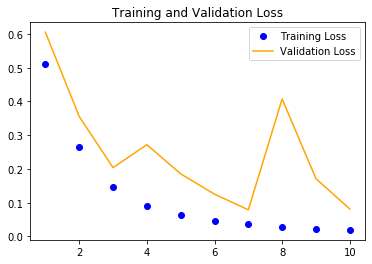

In [12]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)

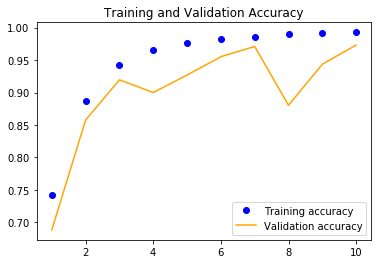

In [13]:
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [14]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [15]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC-AUC Score: 0.9969369199999999
AP Score: 0.9963561131117402

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10000
           1       0.98      0.97      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

